In [5]:
import configparser
import os
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

test_dir = os.path.join(os.getcwd(), 'unit_tests_results_dir')

study_config = configparser.ConfigParser()
study_config.add_section('Default')
study_config.set('Default', 'task', 'study')
study_config.set('Default', 'data_root', os.path.join(test_dir, 'Input_dataset'))
study_config.set('Default', 'number_processes', "1")
study_config.add_section('Studies')
study_config.set('Studies', 'input_folder', os.path.join(test_dir, 'StudyResults'))
study_config.set('Studies', 'output_folder', os.path.join(test_dir, 'StudyResults', 'Analysis'))
study_config.set('Studies', 'task', 'segmentation')
study_config.set('Studies', 'class_names', 'tumor')
study_config.set('Studies', 'extra_parameters_filename', os.path.join(test_dir, 'StudyResults', 'external_patient_parameters.csv'))
study_config.set('Studies', 'selections_dense', 'PiW Dice,GT volume (ml),1,All\VS,GT volume (ml),,All')
study_config.set('Studies', 'selections_categorical', '')
study_config_filename = os.path.join(test_dir, 'study_config.ini')
with open(study_config_filename, 'w') as outfile:
    study_config.write(outfile)

print("Running segmentation study analysis unit test.\n")
from raidionicsval.compute import compute
compute(study_config_filename)

Running segmentation study analysis unit test.

Computed confidence intervals for: _overall_tumor

[[0.87746479]
 [0.9334098 ]]
[[0.87737423]
 [0.93334895]]
Computed confidence intervals for: _overall_tumor_tp

[[0.87779333]
 [0.93339105]]
[[0.87792991]
 [0.93331201]]
Skipping analysis for GT volume (ml) <=1.0. Collected pd.DataFrame is empty.



In [2]:
# Visualize the correlation between all computed metrics
from IPython.display import HTML, display

correlation_matrix_path = os.path.join(test_dir, 'StudyResults', 'Analysis', 'correlation_matrix_tumor_all.html')
with open(correlation_matrix_path, 'r') as file:
    html_content = file.read()

display(HTML(html_content))

,PiW Dice,PiW Recall,PiW Precision,PiW F1,GT volume (ml),True Positive,Detection volume (ml),OW Dice,OW Recall,OW Precision,OW F1,OW Dice Largest Object,#GT,#Det,TPR,TNR,FPR,FNR,PPV,Jaccard,IOU,AUC,VS,VC
PiW Dice,1.000000,0.565088,0.738011,1.000000,0.521950,nan,0.534655,0.203585,-0.152426,0.594020,0.331196,0.860702,-0.068463,-0.492064,0.565088,-0.307041,0.307041,-0.565088,0.738011,0.999583,0.999583,0.564449,0.924100,0.933988
PiW Recall,0.565088,1.000000,-0.138846,0.565088,0.030274,nan,0.056051,0.032060,-0.116556,-0.234371,-0.263195,0.840109,0.220897,0.229426,1.000000,-0.176431,0.176431,-1.000000,-0.138846,0.562569,0.562569,0.999995,0.361133,0.584073
PiW Precision,0.738011,-0.138846,1.000000,0.738011,0.617846,nan,0.612133,0.227155,-0.077249,0.889692,0.609333,0.354819,-0.267878,-0.766730,-0.138846,-0.235059,0.235059,0.138846,1.000000,0.740219,0.740219,-0.139642,0.804390,0.636069
PiW F1,1.000000,0.565088,0.738011,1.000000,0.521950,nan,0.534655,0.203585,-0.152426,0.594020,0.331196,0.860702,-0.068463,-0.492064,0.565088,-0.307041,0.307041,-0.565088,0.738011,0.999583,0.999583,0.564449,0.924100,0.933988
GT volume (ml),0.521950,0.030274,0.617846,0.521950,1.000000,nan,0.999191,0.057540,-0.141181,0.325466,0.138214,0.410774,-0.139099,-0.428879,0.030274,-0.801333,0.801333,-0.030274,0.617846,0.519185,0.519185,0.027832,0.391975,0.441245
True Positive,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Detection volume (ml),0.534655,0.056051,0.612133,0.534655,0.999191,nan,1.000000,0.034730,-0.167373,0.316037,0.111498,0.431549,-0.114836,-0.423869,0.056051,-0.812156,0.812156,-0.056051,0.612133,0.532240,0.532240,0.053588,0.404056,0.447789
OW Dice,0.203585,0.032060,0.227155,0.203585,0.057540,nan,0.034730,1.000000,0.933130,0.161660,0.821093,0.158755,-0.858660,-0.090878,0.032060,0.356335,-0.356335,-0.032060,0.227155,0.207265,0.207265,0.033171,-0.004827,0.202792
OW Recall,-0.152426,-0.116556,-0.077249,-0.152426,-0.141181,nan,-0.167373,0.933130,1.000000,-0.111111,0.666667,-0.106591,-0.804030,0.156174,-0.116556,0.462797,-0.462797,0.116556,-0.077249,-0.148460,-0.148460,-0.115198,-0.353240,-0.129242
OW Precision,0.594020,-0.234371,0.889692,0.594020,0.325466,nan,0.316037,0.161660,-0.111111,1.000000,0.666667,0.107092,-0.301511,-0.884985,-0.234371,0.008246,-0.008246,0.234371,0.889692,0.590848,0.590848,-0.234472,0.767683,0.575245


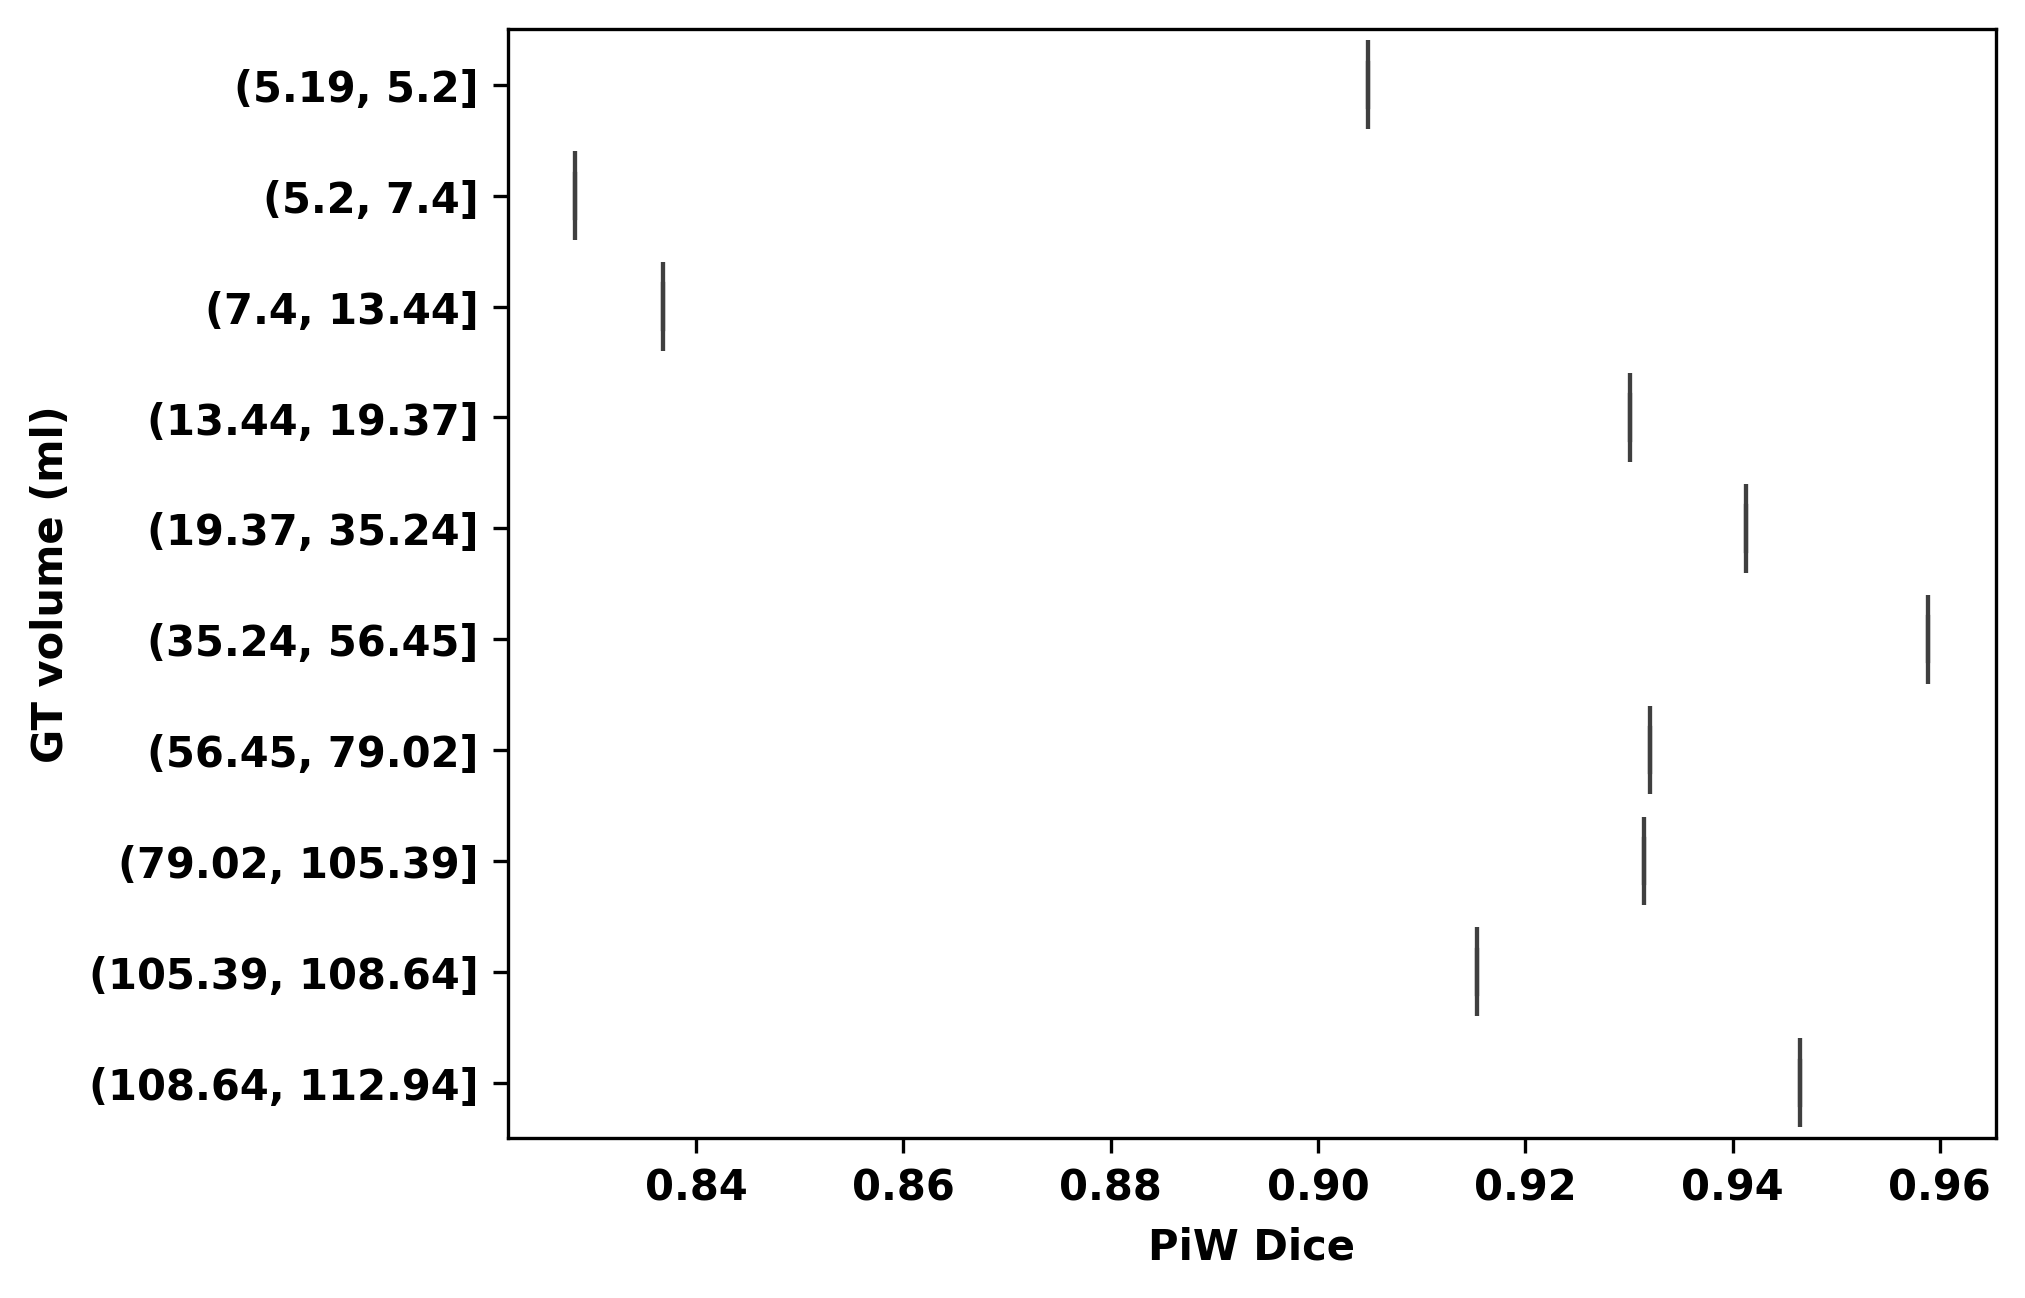

In [3]:
# Visualize the Pixel-wise Dice versus volume (ml) distribution as boxplots for the tumor class
from IPython.display import Image

boxplot_filename = os.path.join(test_dir, 'StudyResults', 'Analysis', 'GT volume (ml)-Wise', 'boxplot_PiW Dice_over_GT volume (ml)_equal_bins_overall__tumor.png')

display(Image(filename=boxplot_filename))